<a href="https://colab.research.google.com/github/mkitti/COVID-19/blob/lavery_notebook/Covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Notebook
## Original notebook by Leon Avery, PhD
https://www.facebook.com/leon.avery.10/posts/10221691168285770
Original version: http://www.math.uwaterloo.ca/~lavery/Covid-19/

This notebook has been adapted by Mark Kittisopikul, PhD, for general use. This notebook
1. Pulls data from Johns Hopkins University Center for Systems Science and Engineering at https://github.com/CSSEGISandData/COVID-19
2. Imports the data into a table via Pandas
3. Plots the data

In [0]:
import os, csv
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import numpy as np
%matplotlib inline

In [0]:
nation = 'US'
series = 'Confirmed'

In [3]:
# Retrieve data via git
datasource = 'https://github.com/CSSEGISandData/COVID-19.git'

if(os.path.isdir('csse_covid_19_data')):
  # Assume we are in a cloned git repository
  subprocess.run(['git','remote','add','CSSEGISandData',datasource])
  subprocess.run(['git','fetch','CSSEGISandData'])
  subprocess.run(['git','merge','CSSEGISandData/master'])
  print('Data merged')
else:
  # Assume no data has been downloaded
  subprocess.run(['git','clone',datasource])
  os.chdir('COVID-19')
  print('Data cloned')

Data cloned


In [4]:
covid19_dir = os.getcwd();
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
)
[
    covid19_dir,
    ts_file
]

['/content/COVID-19',
 '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv']

In [0]:
with open(ts_file, 'r') as csvfile:
    tsreader = csv.DictReader(csvfile)
    ts_data = list(tsreader)

In [6]:
ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
ts_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
list(ts_frame.loc[:,'Country/Region'])

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Australia',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Australia',
 'Belgium',
 'Egypt',
 'Australia',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Australia',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Australia',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Australia',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzeg

In [8]:
nationrows = ts_frame.loc[:, 'Country/Region'] == nation
nationrows

0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440     True
441    False
Name: Country/Region, Length: 442, dtype: bool

In [9]:
nation_frame = ts_frame[nationrows]
nation_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
100,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,267,366,442,568,572
101,New York,US,42.1657,-74.9481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,220,328,421,525
102,California,US,36.1162,-119.6816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,177,221,282,340
103,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,95,108,123,138
104,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,36,42,42,44,44,44,45,45,45,45,45,45,45,45,46,46,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,"Wayne, MI",US,42.2791,-83.3362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
402,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6
424,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [10]:
nation_frame.aggregate(np.sum)

Province/State    WashingtonNew YorkCaliforniaMassachusettsDiamo...
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Lat                                                         9517.56
Long                                                       -23096.6
1/22/20                                                           1
1/23/20                                                           1
1/24/20                                                           2
1/25/20                                                           2
1/26/20                                                           5
1/27/20                                                           5
1/28/20                                                           5
1/29/20                                                           5
1/30/20                                                           5
1/31/20                                                           7
2/1/20                                          

In [11]:
nation_series = nation_frame.agg(np.sum)[4:]
[
    type(nation_series),
    nation_series
]

[pandas.core.series.Series, 1/22/20       1
 1/23/20       1
 1/24/20       2
 1/25/20       2
 1/26/20       5
 1/27/20       5
 1/28/20       5
 1/29/20       5
 1/30/20       5
 1/31/20       7
 2/1/20        8
 2/2/20        8
 2/3/20       11
 2/4/20       11
 2/5/20       11
 2/6/20       11
 2/7/20       11
 2/8/20       11
 2/9/20       11
 2/10/20      11
 2/11/20      12
 2/12/20      12
 2/13/20      13
 2/14/20      13
 2/15/20      13
 2/16/20      13
 2/17/20      13
 2/18/20      13
 2/19/20      13
 2/20/20      13
 2/21/20      15
 2/22/20      15
 2/23/20      15
 2/24/20      51
 2/25/20      51
 2/26/20      57
 2/27/20      58
 2/28/20      60
 2/29/20      68
 3/1/20       74
 3/2/20       98
 3/3/20      118
 3/4/20      149
 3/5/20      217
 3/6/20      262
 3/7/20      402
 3/8/20      518
 3/9/20      583
 3/10/20     959
 3/11/20    1281
 3/12/20    1663
 3/13/20    2179
 3/14/20    2727
 dtype: object]

In [12]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[
    type(strdates),
    strdates,
    type(dates),
    dates,
    np.array(nation_series[:])
]

[pandas.core.indexes.base.Index,
 Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
        '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
        '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
        '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
        '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
        '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
        '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
        '3/13/20', '3/14/20'],
       dtype='object'),
 list,
 [Timestamp('2020-01-22 00:00:00'),
  Timestamp('2020-01-23 00:00:00'),
  Timestamp('2020-01-24 00:00:00'),
  Timestamp('2020-01-25 00:00:00'),
  Timestamp('2020-01-26 00:00:00'),
  Timestamp('2020-01-27 00:00:00'),
  Timestamp('2020-01-28 00:00:00'),
  Timestamp('2020-01-29 00:00:00'),
  Timestam

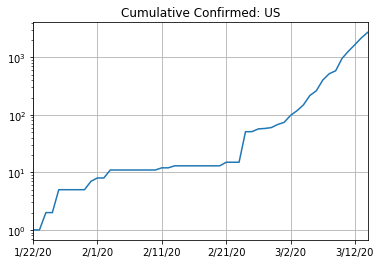

In [13]:
nation_series.plot(
    logy=True, 
    title='Cumulative {series}: {nation}'.format(series=series, nation=nation)
)
plt.grid(True)

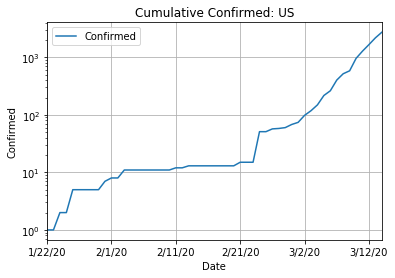

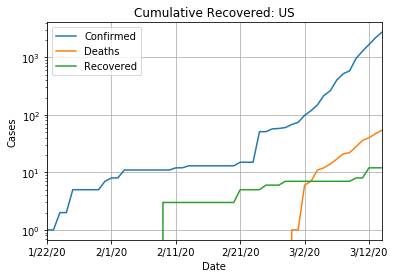

In [14]:
nations = sorted(ts_frame.loc[:,'Country/Region'].unique())
series_options = ['Confirmed','Deaths','Recovered']
#series_options = [re.match(r'time_series_19-covid-(.*).csv',file)[1] for file in os.listdir(os.path.join(
#    covid19_dir,
#    'csse_covid_19_data',
#    'csse_covid_19_time_series'))
#  if re.match(r'time_series_19-covid-(.*).csv',file)
#]

# Plot a single series combining all the code above
def plot_single_series(nation,series):
  ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
  )
  ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
  nationrows = ts_frame.loc[:, 'Country/Region'] == nation
  nation_frame = ts_frame[nationrows]
  nation_series = nation_frame.agg(np.sum)[4:]
  strdates = nation_series.keys()
  dates = [pd.to_datetime(sd) for sd in strdates]
  nation_series.plot(
      logy=True, 
      title='Cumulative {series}: {nation}'.format(series=series, nation=nation)
  )
  plt.grid(True)
  plt.ylabel(series)
  plt.xlabel('Date')
  plt.legend([series])

# Plot all the series
def plot_all_series(nation):
  for series in series_options:
    plot_single_series(nation,series)
  plt.ylabel('Cases')
  plt.legend(series_options)

plt.figure()
plot_single_series(nation,series)

plt.figure()
plot_all_series(nation)

In [15]:
from ipywidgets import interactive
import ipywidgets as widgets

nations_widget = widgets.Dropdown(
    options = nations,
    value = nation,
    description = "Nation: "
)

interactive(plot_single_series,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=135, options=('Afghanistan', 'Albania', 'Algeria'…

In [16]:
interactive(plot_all_series,nation=nations_widget)

interactive(children=(Dropdown(description='Nation: ', index=135, options=('Afghanistan', 'Albania', 'Algeria'…